<a href="https://colab.research.google.com/github/Vikashkrishna/ML_LAB/blob/main/2348571_lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/email_spam.csv')

In [ ]:
df.head()

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam


In [ ]:
df=df.drop(['title'],axis=1)

In [ ]:
df.isnull().sum()

text    0
type    0
dtype: int64

In [ ]:
df.shape

(84, 2)

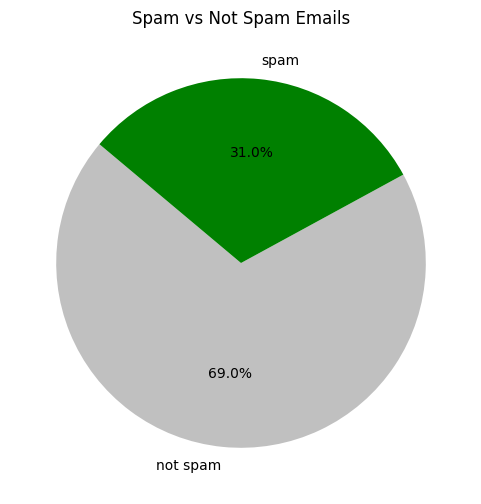

In [ ]:
spam_counts = df['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(spam_counts, labels=spam_counts.index, autopct='%1.1f%%', startangle=140,colors=['silver','green'])
plt.title('Spam vs Not Spam Emails')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['type'].apply(lambda x: 1 if x == 'spam' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)
alpha = 1.0  # Laplace smoothing parameter
model = MultinomialNB(alpha=alpha)
model.fit(X_train_transformed, y_train)

MultinomialNB()

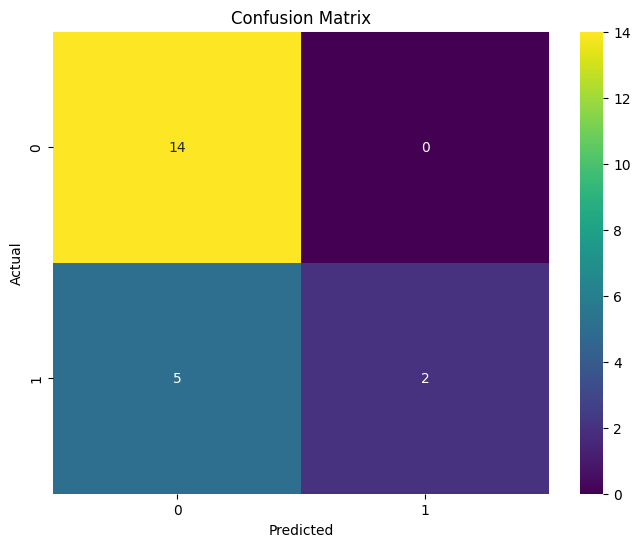

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, f1_score
y_pred = model.predict(X_test_transformed)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


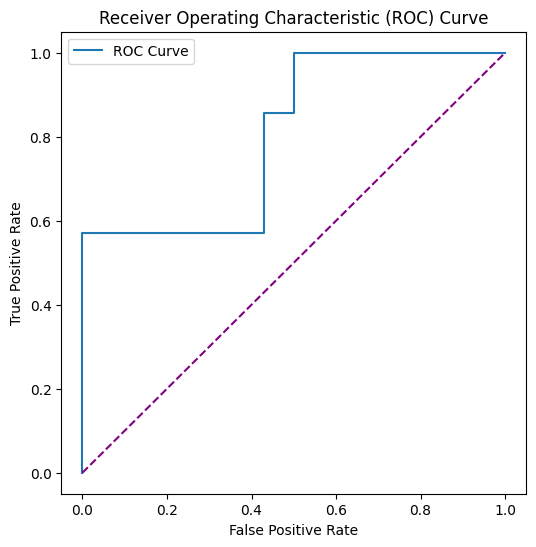

In [ ]:
y_prob = model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='purple')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

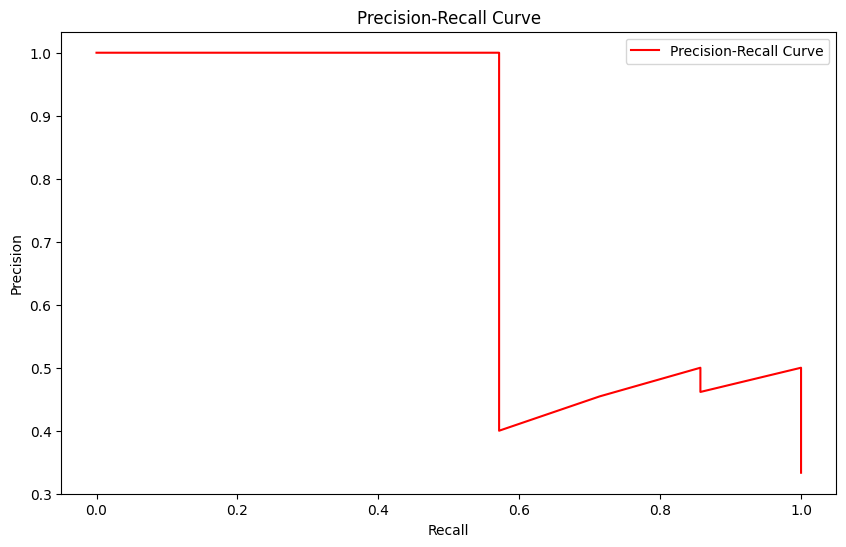

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label='Precision-Recall Curve',color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


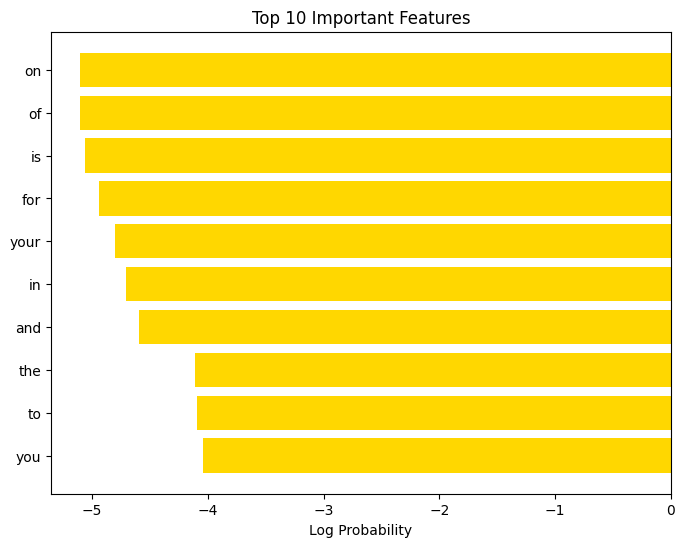

In [ ]:
feature_names = vectorizer.get_feature_names_out()
feature_probabilities = model.feature_log_prob_[1]  # Considering spam class

sorted_indices = feature_probabilities.argsort()[::-1]
top_n = 10  # Displaying top N important features
top_features = [feature_names[i] for i in sorted_indices[:top_n]]
top_probabilities = [feature_probabilities[i] for i in sorted_indices[:top_n]]

plt.figure(figsize=(8, 6))
plt.barh(top_features, top_probabilities, color='gold')
plt.xlabel('Log Probability')
plt.title('Top 10 Important Features')
plt.show()



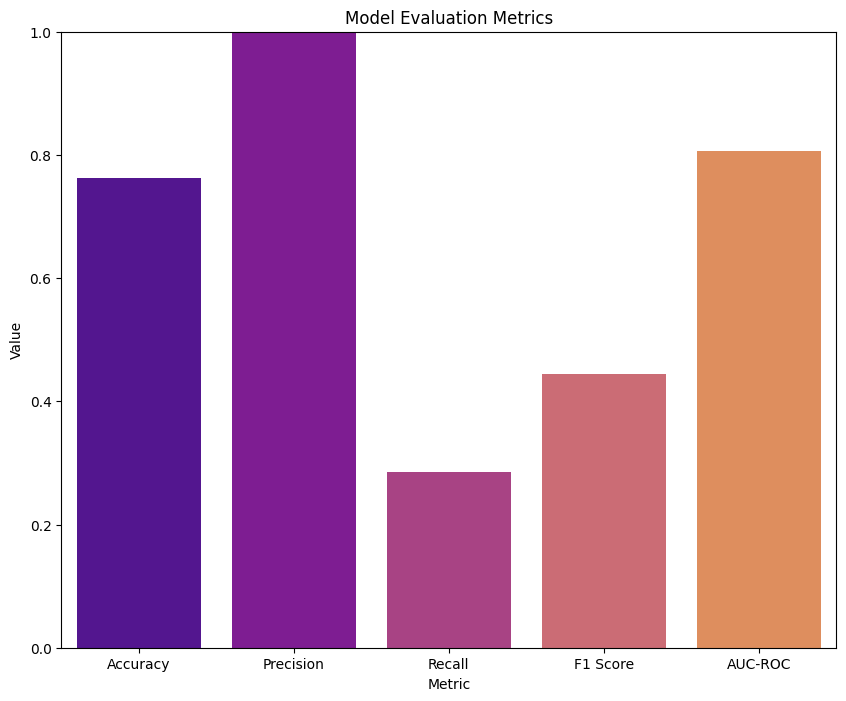

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_prob)

metrics = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC'],
    'Value': [accuracy, precision, recall, f1, auc_roc]
})

plt.figure(figsize=(10, 8))
sns.barplot(x='Metric', y='Value', data=metrics)
sns.set_palette("plasma")
plt.title('Model Evaluation Metrics')
plt.ylim(0, 1)
plt.show()
